## Lab 9 Tasks Solution

Step 1. Download a subset of the 2017 World Happiness Index data from the link below, and load the data into a Pandas Data Frame

http://mlg.ucd.ie/modules/COMP41680/happiness2017.csv

In [1]:
import pandas as pd
df = pd.read_csv("http://mlg.ucd.ie/modules/COMP41680/happiness2017.csv",index_col="Country")
df.head(10)

,Happiness,Family,Health,Freedom
Country,,,,
Afghanistan,3.794,0.581543,0.180747,0.106180
Albania,4.644,0.803685,0.731160,0.381499
Algeria,5.872,1.146217,0.617585,0.233336
Angola,3.795,1.104412,0.049869,0.000000
Argentina,6.599,1.440451,0.695137,0.494519
Armenia,4.376,1.007484,0.637524,0.198303
Australia,7.284,1.510042,0.843887,0.601607
Austria,7.006,1.459945,0.815328,0.567766
Azerbaijan,5.234,1.152400,0.540776,0.398156


Step 2. Calculate basic summary statistics for the data.

In [2]:
df.describe()

,Happiness,Family,Health,Freedom
count,155.000000,155.000000,155.000000,155.000000
mean,5.354019,1.188898,0.551341,0.408786
std,1.131230,0.287263,0.237073,0.149997
min,2.693000,0.000000,0.000000,0.000000
25%,4.505500,1.042635,0.369866,0.303677
50%,5.279000,1.253918,0.606042,0.437454
75%,6.101500,1.414316,0.723008,0.516561
max,7.537000,1.610574,0.949492,0.658249


Step 3. Generate a boxplot of the numeric variables in the dataset.

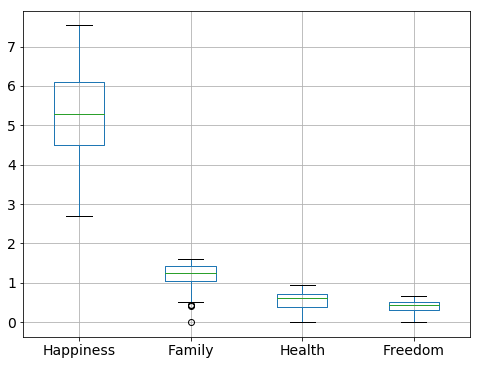

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot(figsize=(8,6), fontsize=14);

Step 4. Apply a simple linear regression to learn (fit) the model, where *Family* is the independent variable and *Happiness* is the target variable that we would like to predict. Produce a plot of the regression line.

Model intercept is [ 1.82983215]
Model slope is [ 2.96424752]


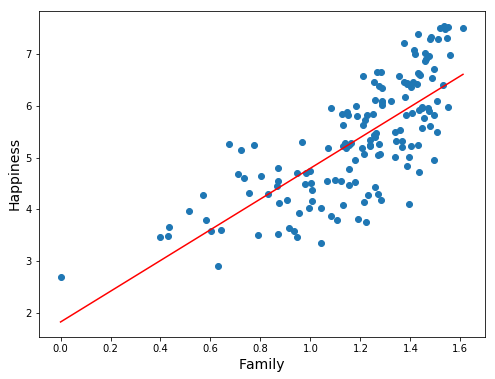

In [4]:
# Get the columns
x = df[["Family"]].values
y = df[["Happiness"]].values
# Now build the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
print("Model intercept is", model.intercept_)
print("Model slope is", model.coef_[0])
# plot the data
plt.figure(figsize=(8,6))
plt.scatter(x, y)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel('Family', fontsize=14)
plt.ylabel('Happiness', fontsize=14);

Step 5. Repeat the process from Step 4, but this time use *Freedom* as the independent variable. Based on your plots, which variable appears to be a better fit?

Model intercept is [ 0.28675359]
Model slope is [ 0.22133748]


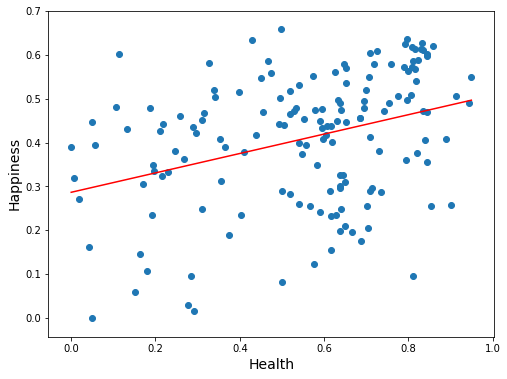

In [5]:
# Get the columns
x = df[["Health"]].values
y = df[["Freedom"]].values
# Now build the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
print("Model intercept is", model.intercept_)
print("Model slope is", model.coef_[0])
# plot the data
plt.figure(figsize=(8,6))
plt.scatter(x, y)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel('Health', fontsize=14)
plt.ylabel('Happiness', fontsize=14);

Family appears to be a much better fit than Freedom. We could also investigate this by looking at their correlations with Happiness:

In [6]:
df.corr()

,Happiness,Family,Health,Freedom
Happiness,1.000000,0.752737,0.781951,0.570137
Family,0.752737,1.000000,0.612080,0.424966
Health,0.781951,0.612080,1.000000,0.349827
Freedom,0.570137,0.424966,0.349827,1.000000
